### **PDP 생성**

In [ ]:
pip install pdp

  Created wheel for pdp: filename=pdp-0.3.0-cp37-none-any.whl size=6603 sha256=c634695a7c615330f4b62cd127e169fe9a862518f3797cf8dba3b2182d9e4010
  Stored in directory: /root/.cache/pip/wheels/84/fb/5e/afb783110614b3c1a4187e6f83e4f4ea0088fbdb82921013a2
Successfully built pdp


In [ ]:
pip install PDPbox

     |████████████████████████████████| 57.7MB 74kB/s 
  Created wheel for PDPbox: filename=PDPbox-0.2.0-cp37-none-any.whl size=57690722 sha256=7b8a3220746973ebc817390b1102018aa88461dd8eceaa1fd1b79281ff910d50
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built PDPbox


In [ ]:
# 추가적으로 필요한 Lib Import 합니다.
import matplotlib.pyplot as plt
from pdpbox import pdp
from pdpbox.pdp import pdp_isolate, pdp_plot,pdp_interact, pdp_interact_plot
import seaborn as sns

In [ ]:
df = pd.concat([X_train,pd.DataFrame(y_train)],axis=1)
target = 0

X = df[features]
y = df[target]
features = X.columns

pipe = pipe_xgb
pipe.fit(X, y);

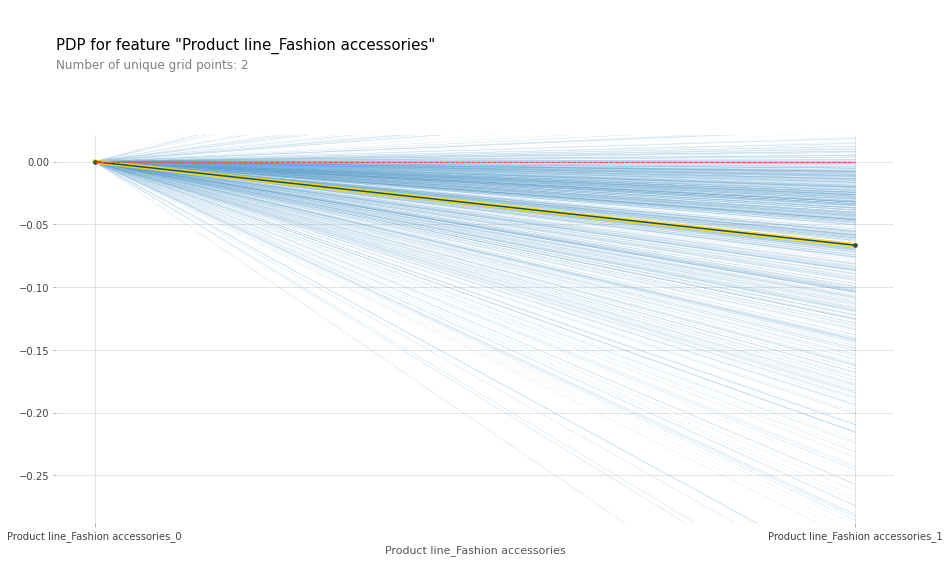

In [ ]:
# 한가지 요건에 대한 PDP 값을 생성해봅니다.
feature='Product line_Fashion accessories'
xgb = pipe_xgb.named_steps['xgbclassifier']

pdp_dist = pdp.pdp_isolate(model=xgb, dataset=X, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature, plot_lines=True); #ice plot -> plot_lines=True

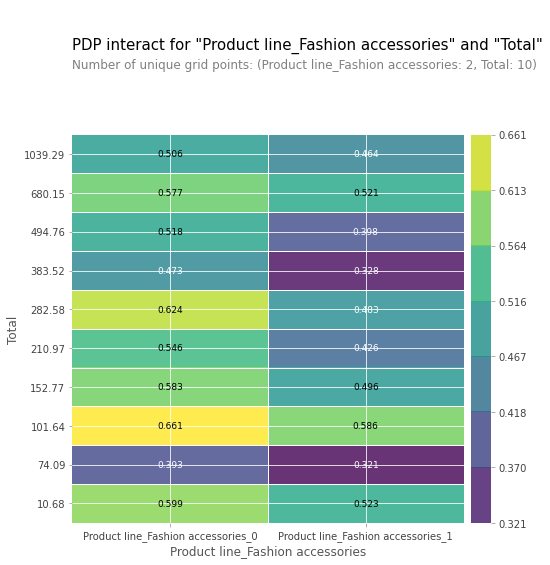

In [ ]:
# 두가지 요건에 대한 PDP 값을 생성해봅니다.
feature = ['Product line_Fashion accessories', 'Total']

interaction = pdp_interact(
    model=xgb, 
    dataset=X,
    model_features=features, 
    features=feature
)

pdp_interact_plot(interaction, plot_type='grid', 
                  feature_names=feature);

In [ ]:
# pdp값을 수치화합니다.
interaction.pdp

,Product line_Fashion accessories,Total,preds
0,0.0,10.6785,0.598863
1,0.0,74.0880,0.392820
2,0.0,101.6400,0.661466
3,0.0,152.7750,0.583133
4,0.0,210.9660,0.546120
5,0.0,282.5760,0.624347
6,0.0,383.5230,0.473018
7,0.0,494.7600,0.517599
8,0.0,680.1480,0.577418
9,0.0,1039.2900,0.505746


### **SHAP 라이브러리 활용한 분석**

In [ ]:
!pip install shap

     |████████████████████████████████| 358kB 5.5MB/s 
  Created wheel for shap: filename=shap-0.38.1-cp37-cp37m-linux_x86_64.whl size=490506 sha256=f63bd9229795f6ef88a20e2ecbfee1b0689a30b052a63e46c4585bd907497d9b
  Stored in directory: /root/.cache/pip/wheels/a8/fb/e4/88012be41842b9be62ae18d82d1b1e880daf8539d1fef1fa00
Successfully built shap


In [ ]:
# 필요한 추가 Lib Impoprt
import shap

In [ ]:
# 데이터 집합을 생성합니다.

a = pd.merge(X_val,pd.DataFrame(y_val),right_index=True,left_index=True)
b = pd.merge(a,pd.DataFrame(pred_xgb),right_index=True,left_index=True)

# 옳게 잘 예측한 데이터셋
T_set = b[b['0_x']==b['0_y'] ]

# 옳지 않게 예측한 데이터셋
F_set=b[b['0_x']!=b['0_y'] ] 

true0_pred0 = T_set[(T_set['0_x']==0) & (T_set['0_y']==0)].index
true1_pred1 = T_set[(T_set['0_x']==1) & (T_set['0_y']==1)].index
true0_pred1 = F_set[(F_set['0_x']==0) & (F_set['0_y']==1)].index
true1_pred0 = F_set[(F_set['0_x']==1) & (F_set['0_y']==0)].index

In [ ]:
# 0을 0으로 예측을 올바르게 한 특정 값의 예측 과정을 설명한 shap 그래프입니다.

row = X_val.iloc[[random.choice(true0_pred0)]]
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=row
)

In [ ]:
feature_names = row.columns
feature_values = row.values[0]
shaps = pd.Series(shap_values[0], zip(feature_names, feature_values))

pros = shaps.sort_values(ascending=False)[:3].index
cons = shaps.sort_values(ascending=True)[:3].index


print('예측에 대한 Positive 요인 Top 3 입니다:')
for i, pro in enumerate(pros, start=1):
    feature_name, feature_value = pro
    print(f'{i}. {feature_name} : {feature_value}')

print('\n')
print('Negative 요인 Top 3 입니다:')
for i, con in enumerate(cons, start=1):
    feature_name, feature_value = con
    print(f'{i}. {feature_name} : {feature_value}')

예측에 대한 Positive 요인 Top 3 입니다:
1. Total : 184.086
2. Payment_Ewallet : 1.0
3. Product line_Fashion accessories : 0.0


Negative 요인 Top 3 입니다:
1. Unit price : 29.22
2. Time : 12.0
3. Product line_Sports and travel : 1.0


In [ ]:
# 1을 1로 예측을 올바르게 한 특정 값의 예측 과정을 설명한 shap 그래프입니다.

row = X_val.iloc[[random.choice(true1_pred1)]]
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=row
)

In [ ]:
feature_names = row.columns
feature_values = row.values[0]
shaps = pd.Series(shap_values[0], zip(feature_names, feature_values))

pros = shaps.sort_values(ascending=False)[:3].index
cons = shaps.sort_values(ascending=True)[:3].index


print('예측에 대한 Positive 요인 Top 3 입니다:')
for i, pro in enumerate(pros, start=1):
    feature_name, feature_value = pro
    print(f'{i}. {feature_name} : {feature_value}')

print('\n')
print('Negative 요인 Top 3 입니다:')
for i, con in enumerate(cons, start=1):
    feature_name, feature_value = con
    print(f'{i}. {feature_name} : {feature_value}')

예측에 대한 Positive 요인 Top 3 입니다:
1. Time : 20.0
2. Quantity : 1.0
3. Rating : 4.8


Negative 요인 Top 3 입니다:
1. Total : 72.429
2. Branch_A : 0.0
3. Branch_C : 1.0


In [ ]:
# 1을 0으로 예측을 잘못 한 특정 값의 예측 과정을 설명한 shap 그래프입니다.

row = X_val.iloc[[random.choice(true1_pred0)]]
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=row
)

In [ ]:
feature_names = row.columns
feature_values = row.values[0]
shaps = pd.Series(shap_values[0], zip(feature_names, feature_values))

pros = shaps.sort_values(ascending=False)[:3].index
cons = shaps.sort_values(ascending=True)[:3].index


print('예측에 대한 Positive 요인 Top 3 입니다:')
for i, pro in enumerate(pros, start=1):
    feature_name, feature_value = pro
    print(f'{i}. {feature_name} : {feature_value}')

print('\n')
print('Negative 요인 Top 3 입니다:')
for i, con in enumerate(cons, start=1):
    feature_name, feature_value = con
    print(f'{i}. {feature_name} : {feature_value}')

예측에 대한 Positive 요인 Top 3 입니다:
1. Quantity : 7.0
2. Product line_Fashion accessories : 0.0
3. Customer type_Member : 0.0


Negative 요인 Top 3 입니다:
1. Total : 408.7335
2. Unit price : 55.61
3. Rating : 8.5


In [ ]:
# 0을 1로 예측을 잘못 한 특정 값의 예측 과정을 설명한 shap 그래프입니다.

row = X_val.iloc[[random.choice(true0_pred1)]]
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=row
)

In [ ]:
feature_names = row.columns
feature_values = row.values[0]
shaps = pd.Series(shap_values[0], zip(feature_names, feature_values))

pros = shaps.sort_values(ascending=False)[:3].index
cons = shaps.sort_values(ascending=True)[:3].index


print('예측에 대한 Positive 요인 Top 3 입니다:')
for i, pro in enumerate(pros, start=1):
    feature_name, feature_value = pro
    print(f'{i}. {feature_name} : {feature_value}')

print('\n')
print('Negative 요인 Top 3 입니다:')
for i, con in enumerate(cons, start=1):
    feature_name, feature_value = con
    print(f'{i}. {feature_name} : {feature_value}')

예측에 대한 Positive 요인 Top 3 입니다:
1. Unit price : 78.89
2. Time : 20.0
3. Quantity : 7.0


Negative 요인 Top 3 입니다:
1. Total : 579.8415
2. Rating : 7.5
3. Branch_C : 1.0
